Nama: Arif Muhammad Laduni

NIM: 1103213003

Tugas: Week 9 Neural Network Model

Dataset: [boston-house-price.csv](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices)

Link ChatGPT:[Link](https://chatgpt.com/c/b1e5d498-8e54-4c8f-8ce4-79dcc9a17f8b)

In [26]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import library yang diperlukan:

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Load dan persiapkan dataset:

In [28]:
# Path ke file housing.csv
file_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Membaca dataset
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [29]:
# Memisahkan fitur (X) dan target (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membangun model neural network:

In [30]:
# Membangun model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output untuk regresi

# Mengompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
30/30 [==============================] - 1s 8ms/step - loss: 0.4677 - val_loss: 0.1903
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.1739 - val_loss: 0.1386
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 0.1281 - val_loss: 0.1204
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 0.1060 - val_loss: 0.1111
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0939 - val_loss: 0.1068
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0866 - val_loss: 0.1036
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0814 - val_loss: 0.1023
Epoch 8/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0769 - val_loss: 0.0977
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0729 - val_loss: 0.0963
Epoch 10/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0698 - val_loss: 0.0952
Epoch 11/

# Evaluasi model:

In [31]:
# Evaluasi model pada data uji
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Prediksi
y_pred = model.predict(X_test)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print(f'Test RMSE: {rmse}')


10/10 [==============================] - 0s 3ms/step - loss: 0.0841
Test Loss: 0.08409081399440765
10/10 [==============================] - 0s 2ms/step
Test RMSE: 0.6848624610326439


# Visualisasi

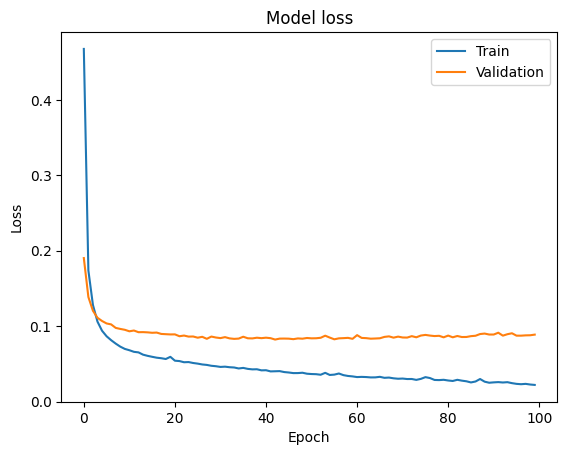

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


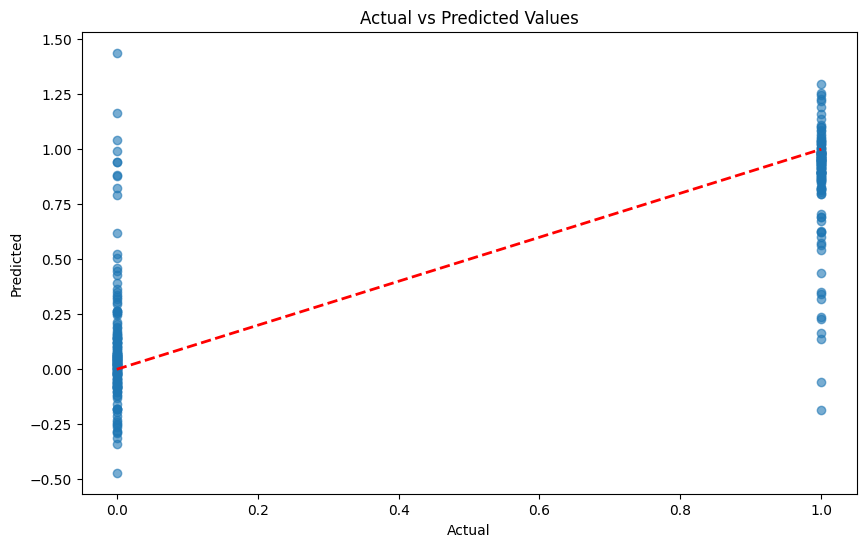

In [35]:
# Visualisasi RMSE
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

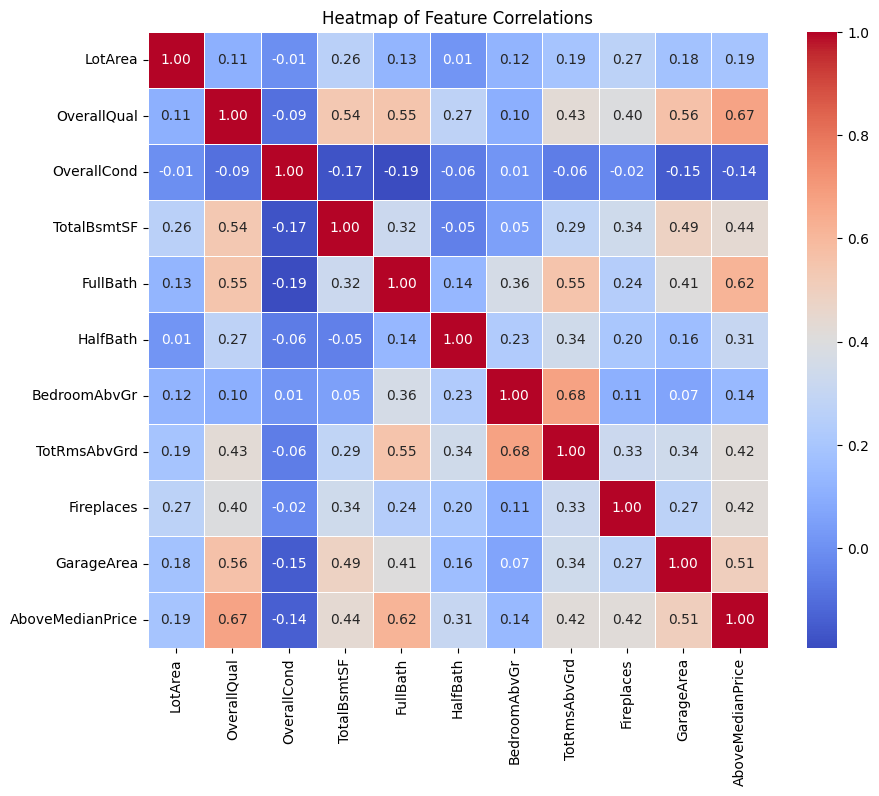

In [34]:
import seaborn as sns

# Menghitung korelasi antar fitur dalam dataset
corr_matrix = data.corr()

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()